# Lab 2 (1|2)
## Excel with Pandas

Start by importing the `Pandas` library.

In [172]:
import pandas as pd

Now import the file _tmdb_5000_movies.csv_ from a csv to a pandas DataFrame. If the notebook is in the same location as the file, you just need to parse the file name. Otherwise, you have to define the whole path.

In [173]:
movies = pd.read_csv('tmdb_5000_movies.csv')

How many columns and rows does our dataset has?

In [174]:
movies.shape

(4803, 20)

Let's see the first 2 rows of our dataset.

In [175]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


What about the last 2 rows?

In [176]:
movies.tail(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


After a close inspection, you realised the dataset had too much irrelevant information for your purpose, so let’s decide to keep only just want the following variables:<br>
`"title", "release_date", "runtime", "vote_average", "budget", "revenue"_`

Display also the first 5 records

In [177]:
cols_to_keep = ['title','status','release_date','runtime', 'vote_count', 'vote_average', 'budget', 'revenue']
movies_filtered = movies[cols_to_keep]
movies_filtered.head()

,title,status,release_date,runtime,vote_count,vote_average,budget,revenue
0,Avatar,Released,2009-12-10,162.0,11800,7.2,237000000,2787965087
1,Pirates of the Caribbean: At World's End,Released,2007-05-19,169.0,4500,6.9,300000000,961000000
2,Spectre,Released,2015-10-26,148.0,4466,6.3,245000000,880674609
3,The Dark Knight Rises,Released,2012-07-16,165.0,9106,7.6,250000000,1084939099
4,John Carter,Released,2012-03-07,132.0,2124,6.1,260000000,284139100


Check the types of the variables using `dtypes` and some other additional information with the `.info()` command.

In [178]:
movies_filtered.dtypes

title            object
status           object
release_date     object
runtime         float64
vote_count        int64
vote_average    float64
budget            int64
revenue           int64
dtype: object

In [179]:
movies_filtered.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4803 non-null   object 
 1   status        4803 non-null   object 
 2   release_date  4802 non-null   object 
 3   runtime       4801 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   vote_average  4803 non-null   float64
 6   budget        4803 non-null   int64  
 7   revenue       4803 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 300.3+ KB


Check for missing values in our data. Start by counting frequency (absolute or relative) of missing observations per feature.

In [180]:
movies_filtered.isna().sum()

title           0
status          0
release_date    1
runtime         2
vote_count      0
vote_average    0
budget          0
revenue         0
dtype: int64

In [181]:
movies_filtered.isna().sum()/movies_filtered.shape[0]

title           0.000000
status          0.000000
release_date    0.000208
runtime         0.000416
vote_count      0.000000
vote_average    0.000000
budget          0.000000
revenue         0.000000
dtype: float64

Now clean the missing values. For `release_date` eliminate the observations, for `runtime` fill the missing data with the median value.

In [182]:
movies_filtered.dropna(subset=['release_date'], inplace=True)

In [183]:
movies_filtered['runtime'] = movies_filtered['runtime'].fillna(movies_filtered['runtime'].median())

In [184]:
movies_filtered.isna().sum()

title           0
status          0
release_date    0
runtime         0
vote_count      0
vote_average    0
budget          0
revenue         0
dtype: int64

Use `describe()` to see some summary statistics on the data. Notice that, as default, it shows the summary statistics for all numerical variables. If you intent to see appropriate metrics for categorical variables, use `include = 'O'` inside the describe command.

In [185]:
movies_filtered.describe()

,runtime,vote_count,vote_average,budget,revenue
count,4802.000000,4802.000000,4802.000000,4.802000e+03,4.802000e+03
mean,106.896501,690.361724,6.093440,2.905109e+07,8.227777e+07
std,22.557033,1234.674268,1.191496,4.072447e+07,1.628697e+08
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,94.000000,54.000000,5.600000,8.000000e+05,0.000000e+00
50%,103.000000,235.500000,6.200000,1.500000e+07,1.917498e+07
75%,117.750000,737.000000,6.800000,4.000000e+07,9.291920e+07
max,338.000000,13752.000000,10.000000,3.800000e+08,2.787965e+09


In [186]:
movies_filtered.describe(include='O')

,title,status,release_date
count,4802,4802,4802
unique,4799,3,3280
top,Out of the Blue,Released,2006-01-01
freq,2,4794,10


You can also access each column statistics individually, or even change its datatype!

In [187]:
movies_filtered['runtime'].mean()

106.89650145772595

In [188]:
movies_filtered['runtime'] = movies_filtered['runtime'].astype(int)

In [189]:
movies_filtered['runtime']

0       162
1       169
2       148
3       165
4       132
       ... 
4798     81
4799     85
4800    120
4801     98
4802     90
Name: runtime, Length: 4802, dtype: int64

In [190]:
movies_filtered['release_date'] = pd.to_datetime(movies_filtered['release_date'])

In [191]:
movies.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


Filter the dataset by movies that were already released (hint: Look at `status`)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe15e5272d0&gt;

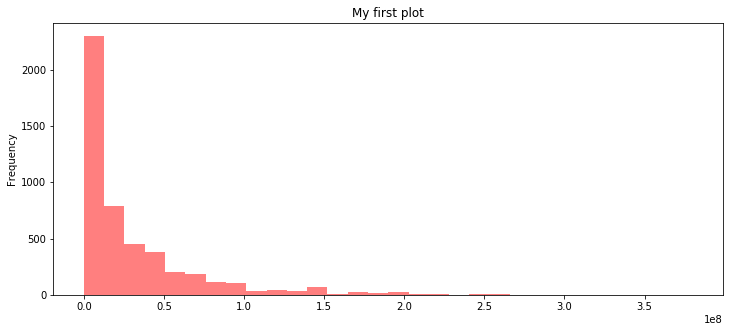

In [192]:
movies['budget'].plot(kind='hist',
                        figsize=(12,5),
                        bins=30,
                        title='My first plot',
                        color='red',
                        alpha=0.5)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe15c1c8b10&gt;

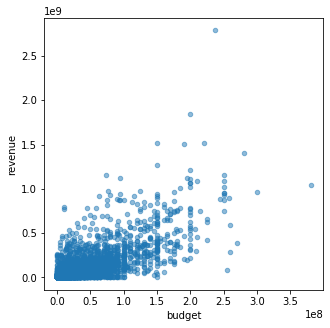

In [193]:
movies_filtered.plot(kind='scatter',
                        x='budget',
                        y='revenue',
                        figsize=(5,5),
                        alpha=0.5)

In [194]:
movies_filtered['status'].unique()

array([&#39;Released&#39;, &#39;Post Production&#39;, &#39;Rumored&#39;], dtype=object)

In [195]:
movies_filtered = movies_filtered[movies_filtered['status'] == 'Released']

Now that the status is always the same (released movies) we can drop that variable.

In [196]:
movies_filtered.drop(columns=['status'], inplace=True)
movies_filtered.head()

,title,release_date,runtime,vote_count,vote_average,budget,revenue
0,Avatar,2009-12-10,162,11800,7.2,237000000,2787965087
1,Pirates of the Caribbean: At World's End,2007-05-19,169,4500,6.9,300000000,961000000
2,Spectre,2015-10-26,148,4466,6.3,245000000,880674609
3,The Dark Knight Rises,2012-07-16,165,9106,7.6,250000000,1084939099
4,John Carter,2012-03-07,132,2124,6.1,260000000,284139100


Check how variables correlate with each other. This is, their linear association (we will learn more about this in the next class).

Let's use visualizations to understand the data visualization:
* Build an histogram that plots the Budget variable
* Build an histogram that plots the Ratings variable
* Build a scatter plot that plots the relation between the Budget and the Revenue variables

## Data Processing

Change the budget and revenue variables to display values in million USD.

In [197]:
movies_filtered['budget'] = movies_filtered['budget'] / 1000000
movies_filtered['revenue'] = movies_filtered['revenue'] / 1000000

In [198]:
movies_filtered.head()

,title,release_date,runtime,vote_count,vote_average,budget,revenue
0,Avatar,2009-12-10,162,11800,7.2,237.0,2787.965087
1,Pirates of the Caribbean: At World's End,2007-05-19,169,4500,6.9,300.0,961.000000
2,Spectre,2015-10-26,148,4466,6.3,245.0,880.674609
3,The Dark Knight Rises,2012-07-16,165,9106,7.6,250.0,1084.939099
4,John Carter,2012-03-07,132,2124,6.1,260.0,284.139100


Let's create a variable called `profit` that subtracts the budget cost to the total revenue

In [199]:
movies_filtered['profit'] = movies_filtered['revenue'] - movies_filtered['budget']
movies_filtered.head()

,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit
0,Avatar,2009-12-10,162,11800,7.2,237.0,2787.965087,2550.965087
1,Pirates of the Caribbean: At World's End,2007-05-19,169,4500,6.9,300.0,961.000000,661.000000
2,Spectre,2015-10-26,148,4466,6.3,245.0,880.674609,635.674609
3,The Dark Knight Rises,2012-07-16,165,9106,7.6,250.0,1084.939099,834.939099
4,John Carter,2012-03-07,132,2124,6.1,260.0,284.139100,24.139100


In [202]:
movies_filtered.sort_values(by='profit', ascending=False)

,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit
0,Avatar,2009-12-10,162,11800,7.2,237.0,2787.965087,2550.965087
25,Titanic,1997-11-18,194,7562,7.5,200.0,1845.034188,1645.034188
28,Jurassic World,2015-06-09,124,8662,6.5,150.0,1513.528810,1363.528810
44,Furious 7,2015-04-01,137,4176,7.3,190.0,1506.249360,1316.249360
16,The Avengers,2012-04-25,143,11776,7.4,220.0,1519.557910,1299.557910
...,...,...,...,...,...,...,...,...
1652,Dragonball Evolution,2009-04-01,85,462,2.9,100.0,0.000000,-100.000000
141,Mars Needs Moms,2011-03-09,88,199,5.5,150.0,38.992758,-111.007242
338,The Alamo,2004-04-07,137,106,5.8,145.0,25.819961,-119.180039
135,The Wolfman,2010-02-11,102,549,5.5,150.0,0.000000,-150.000000


Using the conditional rules from the last lab class, use them to create a function that transforms the numerical Ratings to a Category value (e.g. a Rating of 9.5 would be in the Excellent category)

In [170]:
def get_Opinion(Rating):
    if Rating < 3:
        Opinion = 'Awful'
    elif Rating >= 3 and Rating < 5:
        Opinion = 'Poor'    
    elif Rating >= 5 and Rating < 7:
        Opinion = 'Average'  
    elif Rating >= 7 and Rating < 9:
        Opinion = 'Good'
    else:
        Opinion = 'Excellent'
    return Opinion

In [203]:
movies_filtered['rating_category'] = movies_filtered['vote_average'].apply(lambda Rating: get_Opinion(Rating))

In [204]:
movies_filtered.head()

,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
0,Avatar,2009-12-10,162,11800,7.2,237.0,2787.965087,2550.965087,Good
1,Pirates of the Caribbean: At World's End,2007-05-19,169,4500,6.9,300.0,961.000000,661.000000,Average
2,Spectre,2015-10-26,148,4466,6.3,245.0,880.674609,635.674609,Average
3,The Dark Knight Rises,2012-07-16,165,9106,7.6,250.0,1084.939099,834.939099,Good
4,John Carter,2012-03-07,132,2124,6.1,260.0,284.139100,24.139100,Average


In [206]:
movies_filtered.groupby(by='rating_category')['title'].count()

rating_category
Average      3284
Awful          86
Excellent       5
Good          981
Poor          438
Name: title, dtype: int64

In [209]:
movies_filtered['rating_category'].value_counts()

Average      3284
Good          981
Poor          438
Awful          86
Excellent       5
Name: rating_category, dtype: int64

Nice! You performed your first data wrangling on a csv file using Python! Now let's save the results into a different csv file called `movies_processed.csv`

In [210]:
movies_filtered.to_csv('movies_processed.csv')

# To be Continued...
### (In Part. 2)